(1295, 1364, 3)


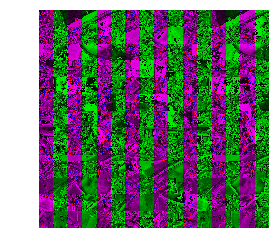

Colorband = NIR


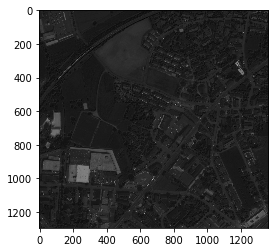

Colorband = Red


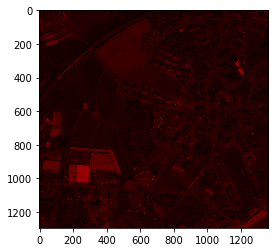

Colorband = Green


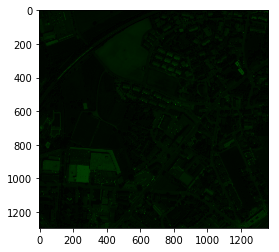

Colorband = Blue


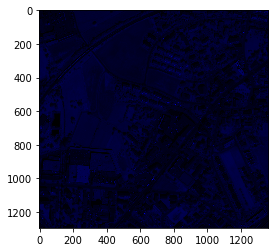

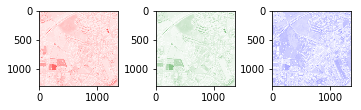

(833, 881, 3)


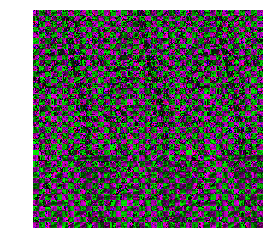

Colorband = NIR


KeyboardInterrupt: 

In [323]:
import tensorflow as tf
from osgeo import gdal
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.colors as clr
import os
import io


def plot_NIR_RGB(n):
    
    src_ds = gdal.Open("Tensorflow tests/Zurich_dataset_v1.0/images_tif/zh{}.tif".format(n))
    data = src_ds.ReadAsArray()
    
#     print(data.shape)
#     print(data[1:, :, :].shape)
    colors = ['NIR', 'Red', 'Green', 'Blue']
    cmap = ['White', 'Red', 'Green', 'Blue']

    rgb = data[1:, :, :].reshape((data.shape[1], data.shape[2],3))
    img = Image.fromarray(rgb, 'RGB')
    img.save('Tensorflow tests/Zurich_dataset_v1.0/rgb_images_tif/Airview_Zurich{}.tif'.format(n))
    
    image = plt.imread('Tensorflow tests/Zurich_dataset_v1.0/rgb_images_tif/Airview_Zurich{}.tif'.format(n))
    fig, ax = plt.subplots()
    im = ax.imshow(image)


    print(image.shape)
    ax.axis('off')
    plt.show()
#     print(rgb.shape)
    
    for i in range(4):
        print('Colorband = {}'.format(colors[i]))
        cm = clr.LinearSegmentedColormap.from_list(colors[i], ['black',cmap[i]], N=256)
        img = plt.imshow(data[i], cmap = cm)
        plt.show()

    w=10
    h=10
    fig = plt.figure(figsize=(8, 8))
    columns = 4
    rows = 5
    for i in range(1, 4, 1):
        img = data[i]
        fig.add_subplot(rows, columns, i)
        cm = clr.LinearSegmentedColormap.from_list(colors[i], ['white',cmap[i]], N=256)
        plt.imshow(img, cmap = cm)
    plt.show()
    
# fill in a value between 1 and 20
for i in range(1,21,1):
    plot_NIR_RGB(i)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


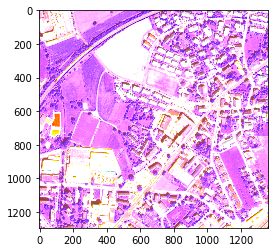

In [393]:
src_ds = gdal.Open("Tensorflow tests/Zurich_dataset_v1.0/images_tif/zh1.tif")
data = src_ds.ReadAsArray()

# restricted area
# xMin = 0
# xMax = 200
# yMin = 0
# yMax = 200
# roadmap = data[1][xMin:xMax, yMin:yMax], data[2][xMin:xMax, yMin:yMax], data[3][xMin:xMax, yMin:yMax]

# unrestricted area
roadmap = data[1:,:,:]

row = range(len(roadmap[0]))
column = range(len(roadmap[0][0]))

rgb = []
for i in row:
    rgb_row = []
    for j in column:
        rgb_row.append([roadmap[0][i][j], roadmap[1][i][j], roadmap[2][i][j]])
        
    rgb.append(rgb_row)
            
plt.imshow(np.array(rgb))
plt.show()


(600, 512, 3)


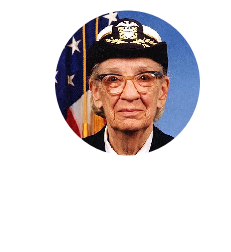

In [260]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.cbook as cbook


with cbook.get_sample_data('grace_hopper.png') as image_file:
    image = plt.imread(image_file)

fig, ax = plt.subplots()
im = ax.imshow(image)
patch = patches.Circle((260, 200), radius=200, transform=ax.transData)
im.set_clip_path(patch)

print(image.shape)
ax.axis('off')
plt.show()